<a href="https://colab.research.google.com/github/CLASS-SZ/notebooks/blob/main/install_class_sz_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

Install class_sz, cosmopower, CMB and Pk emulators, and class_sz wrapper to cosmopower emulators.


This cell takes a few minutes.

In [1]:
%%capture
!pwd
!sudo apt install libgsl-dev
!sudo apt install fftw3-dev


In [ ]:
%%capture
pip install classy_sz

In [1]:
import classy_sz

Using PATH_TO_COSMOPOWER_ORGANIZATION: /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/cosmopower-organization
Found cosmopower-organization directory with all repositories at: /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/cosmopower-organization
PATH_TO_COSMOPOWER_ORGANIZATION is already correctly set.


# Test calculations

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06

}

# a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

Using PATH_TO_COSMOPOWER_ORGANIZATION: /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/cosmopower-organization
Found cosmopower-organization directory with all repositories at: /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/cosmopower-organization
PATH_TO_COSMOPOWER_ORGANIZATION is already correctly set.


In [2]:
%%time
M = Class()
M.set(cosmo_params)
M.set({
'output':'tCl,lCl,pCl',
'skip_background_and_thermo': 1,
'skip_pkl': 1,
'skip_pknl': 1,
'skip_sigma8_at_z': 0,
'skip_hubble': 0,
'skip_chi': 0
})
M.compute_class_szfast()

CPU times: user 52.7 ms, sys: 34.3 ms, total: 87 ms
Wall time: 57.8 ms


In [3]:
lensed_cls = M.lensed_cl()
l_fast = lensed_cls['ell']
cl_tt_fast = lensed_cls['tt']
cl_ee_fast = lensed_cls['ee']
cl_te_fast = lensed_cls['te']
cl_pp_fast = lensed_cls['pp']

In [4]:
z_arr = np.array([0.38, 0.51, 0.61])
print(M.effective_f_sigma8(z_arr[0]))
print(M.Hubble(z_arr[0]))
print(M.angular_distance(z_arr[0]))
M.get_chi(0.2)

0.30873084191492095
0.0002774567267121648
1106.71618009581


570.5536013931951

In [5]:
M.h()

0.6766

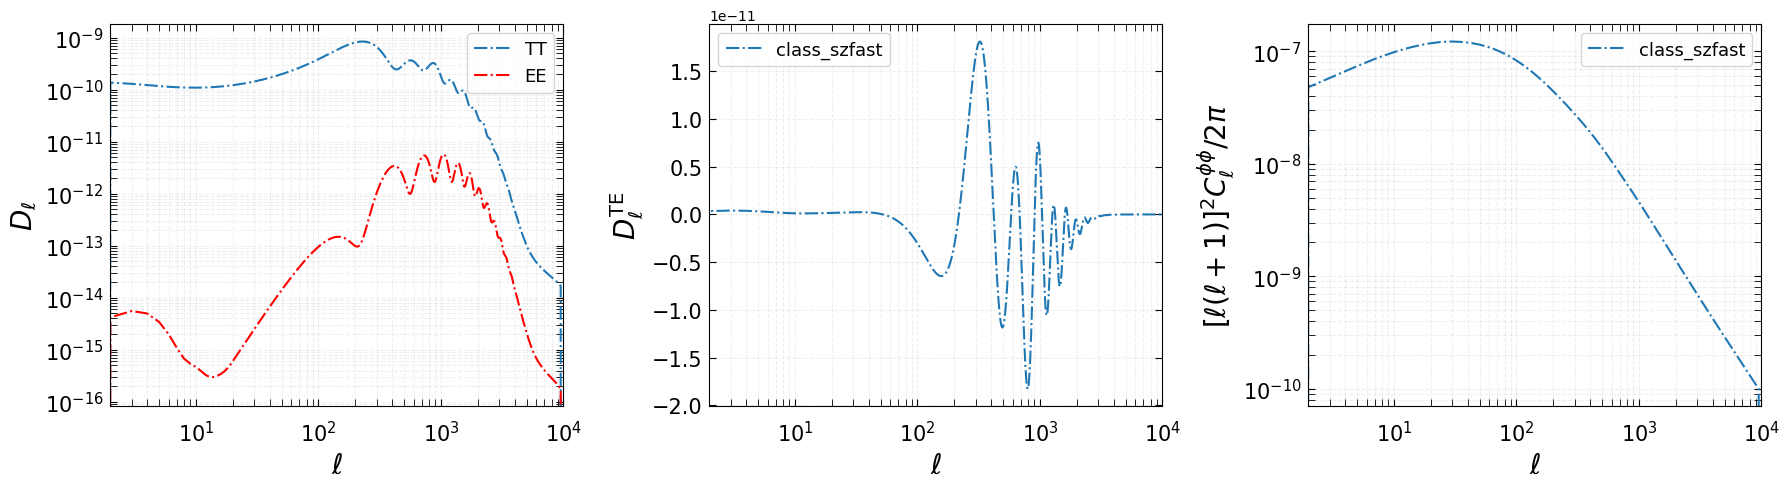

In [6]:
label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')



ax.plot(l_fast,l_to_dl(l_fast)*cl_tt_fast,ls='-.',label='TT')



ax.plot(l_fast,l_to_dl(l_fast)*cl_ee_fast,ls='-.',c='red',label='EE')



ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(2e0,1e4)
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(l_fast,l_to_dl(l_fast)*cl_te_fast,ls='-.',label='class_szfast')


ax.set_ylabel(r"$D_\ell^\mathrm{TE}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim(2e0,1e4)
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(l_fast,l_to_dl(l_fast)*cl_pp_fast*(l_fast*(l_fast+1.)),ls='-.',label='class_szfast')

ax.set_ylabel(r"$[\ell(\ell+1)]^2 C_\ell^{\phi\phi}/2\pi$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(2e0,1e4)
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)
fig.tight_layout()

# P(k) calculation

In [7]:
%%time
M = Class()
M.set(cosmo_params)
M.set({
'output':'mPk',
'skip_background_and_thermo': 1,
'skip_pkl': 0,
'skip_pknl': 1,
'ndim_redshifts': 50,
'skip_chi': 0
})
M.compute_class_szfast()

CPU times: user 131 ms, sys: 35.7 ms, total: 166 ms
Wall time: 79.4 ms


In [8]:
k = np.geomspace(1e-4,1e1)
zpk = 2.
get_pk = np.vectorize(M.pk_lin)
Pk_lin = get_pk(k,zpk)

[]

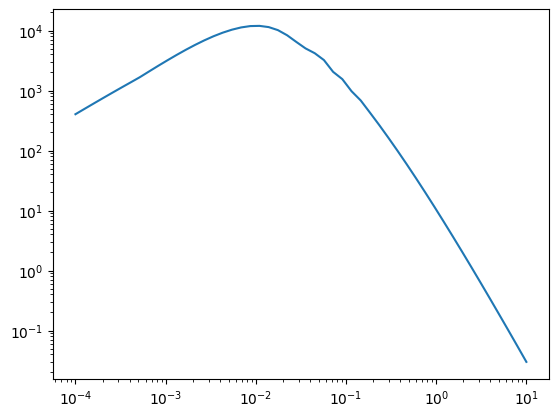

In [9]:
plt.plot(k,Pk_lin)
plt.loglog()

In [10]:
M.get_chi(zpk)

3583.2575583613243

# Interactive P(k) plot -- credit: Paul Rogozenski

In [11]:
import scipy
import pandas as pd


Nk_fid = 1000
k_fid = np.logspace(-4,1,Nk_fid)
k_table = np.array([ 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2])

def compute_pk(H0, A_s, n_s, Omega_b, Omega_CDM, z):

    h = H0/100


    M = Class()
    new_cosmo_params = {
    'omega_b': Omega_b*h**2,
    'omega_cdm':  Omega_CDM*h**2,
    'H0': H0, # use H0 because this is what is used by the emulators.
    'tau_reio': 0.06, # not important for P(k)
    'ln10^{10}A_s': np.log(1e10*A_s),
    'n_s': n_s,

    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
    }
    M.set(new_cosmo_params)
    M.set({
    'output':'mPk',
    'skip_background_and_thermo': 1,
    'skip_pkl': 0,
    'skip_pknl': 1,
    'ndim_redshifts': 30,
    'skip_chi': 0,
    })
    M.compute_class_szfast()
    get_pk = np.vectorize(M.pk_lin)
    Pk_lin = get_pk(k_fid,zpk)


    return Pk_lin, k_fid, M.get_chi(z)

H0_fid, A_s_fid, n_s_fid, Omega_b_fid, Omega_cdm_fid,  z_fid = 66.88,2.091e-9, 0.9626, 0.04945, 0.26962,  1.0

pk_fid, _,_ = compute_pk(H0_fid, A_s_fid, n_s_fid, Omega_b_fid, Omega_cdm_fid, z_fid)

def plot_pk(pk, k, z):
  plt.figure(figsize=(10,10))
  color_fid = 'royalblue'
  color_new = 'darkorange'
  plt.plot(k, pk, color=color_new , label='New Cosmology')
  plt.plot(k_fid, pk_fid, color=color_fid, label='Planck 2018 best-fit cosmology and massless neutrinos')

  fid_peaks = scipy.signal.find_peaks(pk_fid)[0]
  max_pk = max(np.max(pk), np.max(pk_fid))*4
  plt.vlines(k_fid[fid_peaks[0]], 0.1, max_pk,color=color_fid, ls='--', label='Planck 2018 Peak')
  peaks = scipy.signal.find_peaks(pk)[0]
  plt.vlines(k_fid[peaks[0]], 0.1, max_pk,color=color_new , ls='--', label='New Cosmology Peak')

  plt.xscale('log')
  plt.yscale('log')
  plt.xlim((10**-4, 10))
  plt.xlabel(r'$k \,\,\,\,[1/\mathrm{Mpc}]$')

  plt.ylabel(r'$P(k,z) \,\,\,\, [\mathrm{Mpc}]^{-3}$')
  plt.legend()
  plt.show()


def k_l_theta(comoving):
  rs = 2*np.pi/k_table
  thetas = rs/comoving
  ls = np.pi/thetas
  thetas *= (180/np.pi)*60
  my_array = np.array([k_table, ls, thetas, rs])
  my_array = my_array.T
  df = pd.DataFrame(my_array, columns = ['k [1/Mpc]','ell','theta [arcmin]', 'Rmin [Mpc]'])
  return df

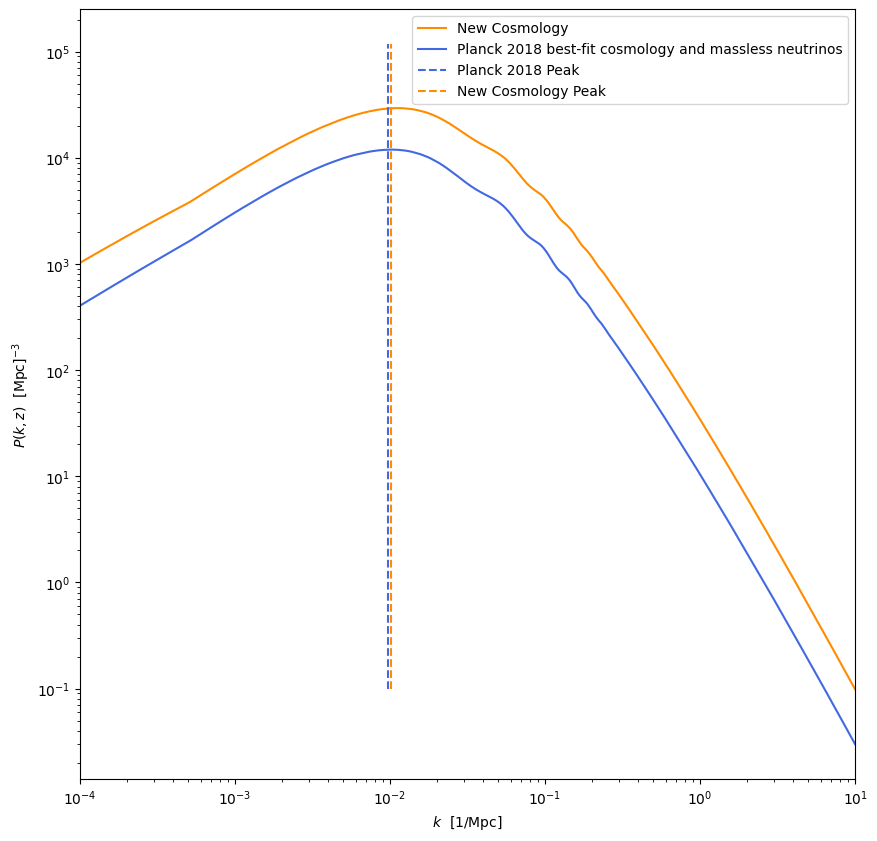

,k [1/Mpc],ell,theta [arcmin],Rmin [Mpc]
0,0.001,1.572883,6866.370321,6283.185307
1,0.010,15.728834,686.637032,628.318531
2,0.100,157.288342,68.663703,62.831853
3,1.000,1572.883415,6.866370,6.283185
4,10.000,15728.834150,0.686637,0.628319
5,100.000,157288.341502,0.068664,0.062832


In [12]:
#@title Set Cosmology Parameters { run: "auto", vertical-output: true}
#@markdown Planck 2018 Best-Fit:

#@markdown $H_0$ = 66.88

#@markdown $A_s$ = 2.091e-9

#@markdown $n_s$ = 0.9626

#@markdown $\Omega_{b}$ = 0.04945

#@markdown $\Omega_{CDM}$ = 0.26962

#@markdown chosen $z$ = 1.0


H0 = 66.89 #@param {type:"slider", value:80, min:50, max:80, step:0.01}
A_s = 5.646e-9 #@param {type:"slider", min:1e-12, max:1e-8, step:1e-12}
n_s = 0.945 #@param {type:"slider", min:0.87, max:1.07, step:0.0001}
Omega_b = 0.04841 #@param {type:"slider", min:0.03, max:0.06, step:0.00001}
Omega_CDM = 0.31124 #@param {type:"slider", min:0.1, max:0.94, step:0.00001}
# m_nu = 0.06 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
z = 1.700001 #@param {type:"slider", min:0.000001, max:5.0, step:0.1}





Pk, k, comoving = compute_pk(H0, A_s, n_s, Omega_b, Omega_CDM, z)
plot_pk(Pk, k,z)
k_l_theta(comoving)
